# Plot grafs and base map
Import functions and load data

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy import signal

In [2]:
FACA = pd.read_csv('/home/simon/Desktop/Bachelor_project/data/cvs_files/FAC_A.csv', index_col=0)
FACA.index = pd.to_datetime(FACA.index)
FACC = pd.read_csv('/home/simon/Desktop/Bachelor_project/data/cvs_files/FAC_C.csv', index_col=0)
FACC.index = pd.to_datetime(FACC.index)
DNS = pd.read_csv('/home/simon/Desktop/Bachelor_project/data/cvs_files/DNS.csv', index_col=0)
DNS.index = pd.to_datetime(DNS.index)
Half_orbit = pd.read_csv('/home/simon/Desktop/Bachelor_project/data/cvs_files/half_orbit_and_omni.csv', index_col=0)
Half_orbit.index = pd.to_datetime(Half_orbit.index)

In [3]:
FACA.FAC.name= 'FAC_A'
FACC.FAC.name= 'FAC_C'

### Plot the the data

<IPython.core.display.Javascript object>


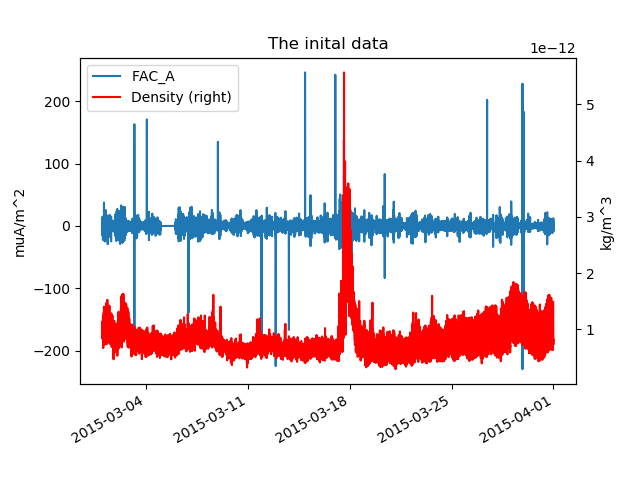

In [4]:
plt.figure()

p1 = FACA.FAC.plot(legend=True)
p2 = DNS.Density.plot(secondary_y=True, style='r',legend=True)
p1.set_ylabel('muA/m^2')
p1.right_ax.set_ylabel('kg/m^3')
plt.title('The inital data')
plt.show()

<IPython.core.display.Javascript object>


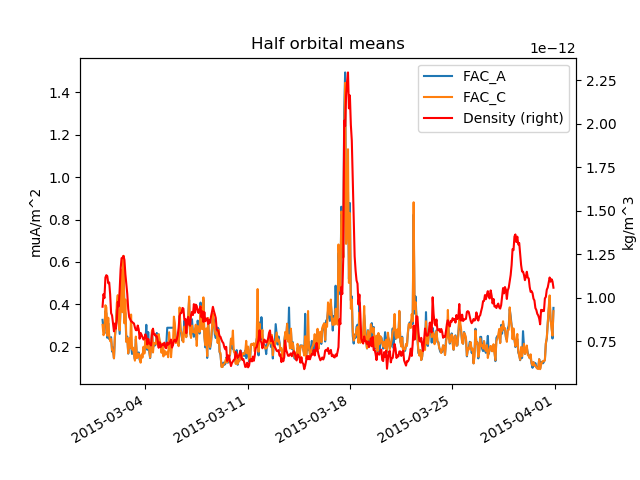

In [5]:
plt.figure()

p1 = Half_orbit[Half_orbit.Hemisphere==1].FAC_A.plot(legend=True)
Half_orbit[Half_orbit.Hemisphere==1].FAC_C.plot(legend=True)
p2 = Half_orbit[Half_orbit.Hemisphere==1].Density.plot(secondary_y=True, style='r',legend=True)
p1.set_ylabel('muA/m^2')
p1.right_ax.set_ylabel('kg/m^3')
plt.title('Half orbital means')
plt.show()

In [6]:
Half_orbit.head(10)

,FAC_A,FAC_C,ap,Density,Orbit_nr,Hemisphere,AP_INDEX,F10_INDEX,BZ_GSE,DST
2015-03-01 00:45:55,0.394035,0.395206,7.0,9.046159e-13,0.0,-1.0,48.0,125.300003,-0.8,-24.0
2015-03-01 01:32:50,0.327109,0.303314,15.0,9.488591e-13,1.0,1.0,48.0,125.300003,2.4,-34.0
2015-03-01 02:19:45,0.424904,0.420610,15.0,1.010551e-12,1.0,-1.0,48.0,125.300003,0.1,-20.0
2015-03-01 03:06:40,0.278338,0.254515,15.0,1.020605e-12,2.0,1.0,48.0,125.300003,-3.7,-20.0
2015-03-01 03:53:30,0.420675,0.476124,15.0,9.270029e-13,2.0,-1.0,48.0,125.300003,-3.7,-20.0
2015-03-01 04:40:20,0.262651,0.267128,22.0,9.985714e-13,3.0,1.0,48.0,125.300003,-0.8,-18.0
2015-03-01 05:27:15,0.440839,0.461298,22.0,9.933494e-13,3.0,-1.0,48.0,125.300003,-2.7,-32.0
2015-03-01 06:14:10,0.368239,0.395947,22.0,1.116663e-12,4.0,1.0,56.0,125.300003,-1.8,-45.0
2015-03-01 07:01:05,0.331665,0.339956,22.0,1.035211e-12,4.0,-1.0,56.0,125.300003,-3.2,-42.0
2015-03-01 07:47:55,0.358068,0.386429,15.0,1.129875e-12,5.0,1.0,56.0,125.300003,-3.2,-42.0


<IPython.core.display.Javascript object>


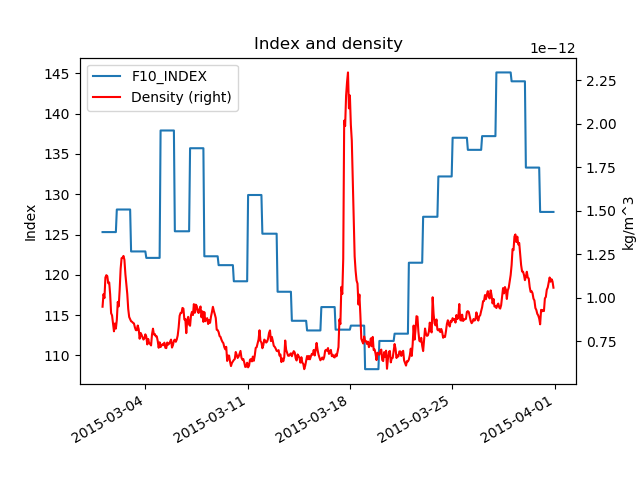

In [7]:
plt.figure()

p1 = Half_orbit[Half_orbit.Hemisphere==1].F10_INDEX.plot(legend=True)
p2 = Half_orbit[Half_orbit.Hemisphere==1].Density.plot(secondary_y=True, style='r',legend=True)
p1.set_ylabel('Index')
p1.right_ax.set_ylabel('kg/m^3')
plt.title('Index and density')
plt.show()

<IPython.core.display.Javascript object>


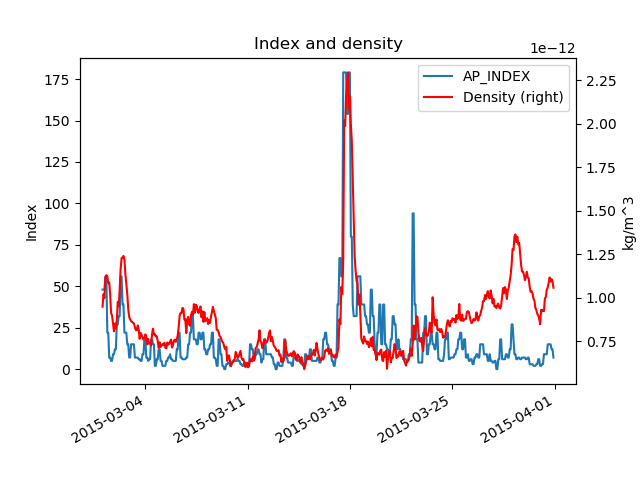

In [8]:
plt.figure()

p1 = Half_orbit[Half_orbit.Hemisphere==1].AP_INDEX.plot(legend=True)
p2 = Half_orbit[Half_orbit.Hemisphere==1].Density.plot(secondary_y=True, style='r',legend=True)
p1.set_ylabel('Index')
p1.right_ax.set_ylabel('kg/m^3')
plt.title('Index and density')
plt.show()

In [9]:
Half_orbit.head()

,FAC_A,FAC_C,ap,Density,Orbit_nr,Hemisphere,AP_INDEX,F10_INDEX,BZ_GSE,DST
2015-03-01 00:45:55,0.394035,0.395206,7.0,9.046159e-13,0.0,-1.0,48.0,125.300003,-0.8,-24.0
2015-03-01 01:32:50,0.327109,0.303314,15.0,9.488591e-13,1.0,1.0,48.0,125.300003,2.4,-34.0
2015-03-01 02:19:45,0.424904,0.420610,15.0,1.010551e-12,1.0,-1.0,48.0,125.300003,0.1,-20.0
2015-03-01 03:06:40,0.278338,0.254515,15.0,1.020605e-12,2.0,1.0,48.0,125.300003,-3.7,-20.0
2015-03-01 03:53:30,0.420675,0.476124,15.0,9.270029e-13,2.0,-1.0,48.0,125.300003,-3.7,-20.0


### Basemap plot of one orbit

In [39]:
orbit_values = FACA[(FACA.Orbit_nr>10) & (FACA.Orbit_nr<20) & (FACA.Hemisphere==1)]

<IPython.core.display.Javascript object>


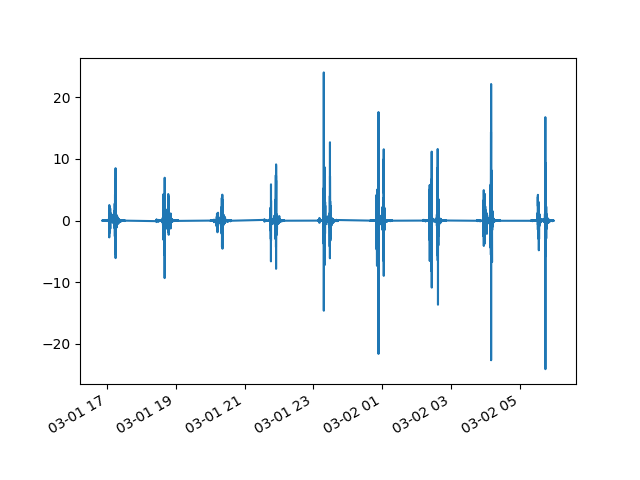

In [40]:
plt.figure()

orbit_values.FAC.plot()
plt.show()

In [44]:
plot_data = orbit_values.rolling(window=10,center=False).mean()

<IPython.core.display.Javascript object>


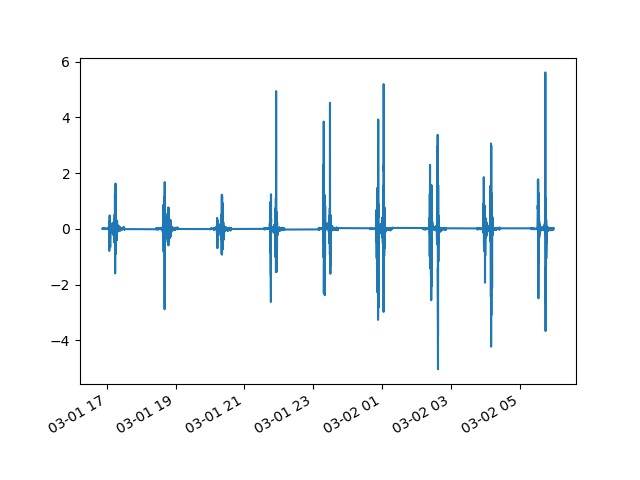

In [45]:
plt.figure()
plot_data.FAC.plot()
plt.show()

<IPython.core.display.Javascript object>


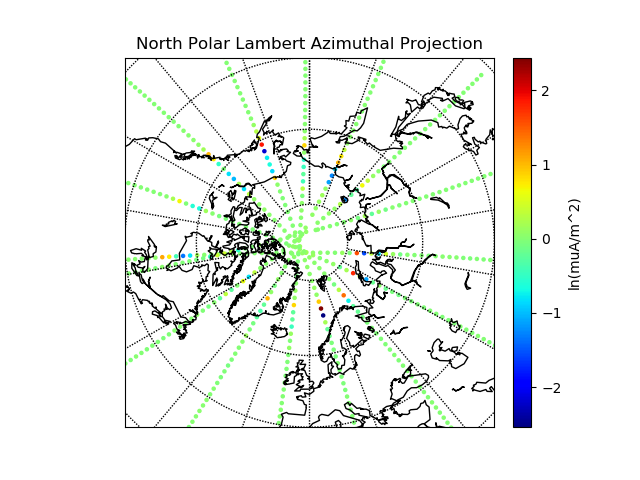

In [38]:
rate = 30
plt.figure()
# setup north polar lambert azimuthal basemap.
# The longitude lon_0 is at 6-o'clock, and the
# latitude circle boundinglat is tangent to the edge
# of the map at lon_0.
m = Basemap(projection='nplaea',boundinglat=40,lon_0=0,resolution='c')
m.drawcoastlines()
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
# draw tissot's indicatrix to show distortion.
ax = plt.gca()
# draw tissot's indicatrix to show distortion.

area = 5*np.ones(len(plot_data.Longitude.values[::rate]))
colors = plot_data.FAC.values[::rate]
x,y = m(plot_data.Longitude.values[::rate], plot_data.Latitude.values[::rate])




cs= m.scatter(x, y, s=area, c=colors,cmap ='jet')

# add colorbar.
cbar = m.colorbar(cs,location='right',pad="5%")
cbar.set_label('ln(muA/m^2)')

plt.title("North Polar Lambert Azimuthal Projection")
plt.show()

<IPython.core.display.Javascript object>


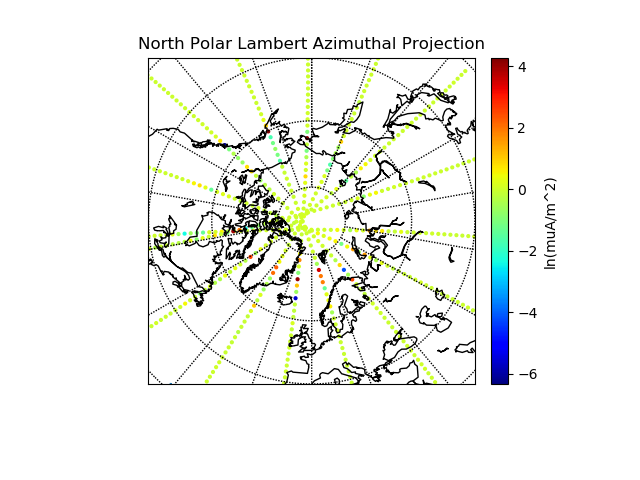

In [29]:
rate = 30
plt.figure()
# setup north polar lambert azimuthal basemap.
# The longitude lon_0 is at 6-o'clock, and the
# latitude circle boundinglat is tangent to the edge
# of the map at lon_0.
m = Basemap(projection='nplaea',boundinglat=40,lon_0=0,resolution='c')
m.drawcoastlines()
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
# draw tissot's indicatrix to show distortion.
ax = plt.gca()
# draw tissot's indicatrix to show distortion.

area = 4*np.ones(len(orbit_values.Longitude.values[::rate]))
colors = orbit_values.FAC.values[::rate]
x,y = m(orbit_values.Longitude.values[::rate], orbit_values.Latitude.values[::rate])




cs= m.scatter(x, y, s=area, c=colors,cmap ='jet')

# add colorbar.
cbar = m.colorbar(cs,location='right',pad="5%")
cbar.set_label('ln(muA/m^2)')

plt.title("North Polar Lambert Azimuthal Projection")
plt.show()

### Corrolation

In [13]:
Half_orbit.iloc[:,[0,1,2,6,3]].corr()

,FAC_A,FAC_C,ap,AP_INDEX,Density
FAC_A,1.000000,0.970549,0.255538,0.709100,0.513183
FAC_C,0.970549,1.000000,0.280182,0.714972,0.511982
ap,0.255538,0.280182,1.000000,0.409511,0.483886
AP_INDEX,0.709100,0.714972,0.409511,1.000000,0.632549
Density,0.513183,0.511982,0.483886,0.632549,1.000000


In [14]:
len(Half_orbit.FAC_A.values)

951

In [15]:
len(Half_orbit.FAC_A.values[10:-10])

931

<IPython.core.display.Javascript object>


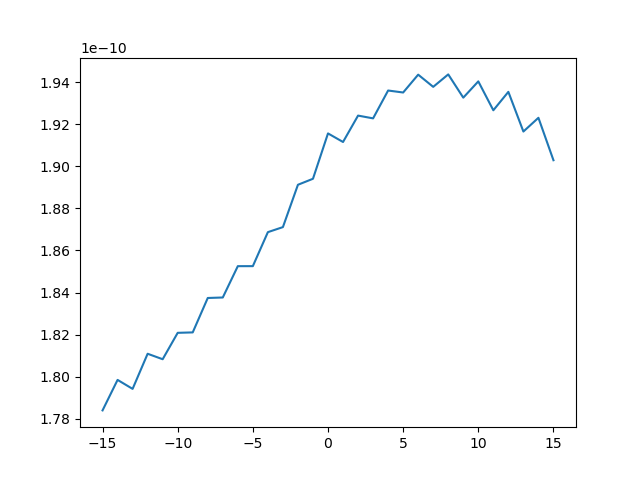

In [16]:
corr_FACA_DNS=signal.correlate(Half_orbit.Density.values,Half_orbit.FAC_A.values[15:-15],mode='valid')

plt.figure()

plt.plot((np.array(range(len(corr_FACA_DNS)))-(len(corr_FACA_DNS)-1)/2),corr_FACA_DNS)
plt.show()

<IPython.core.display.Javascript object>


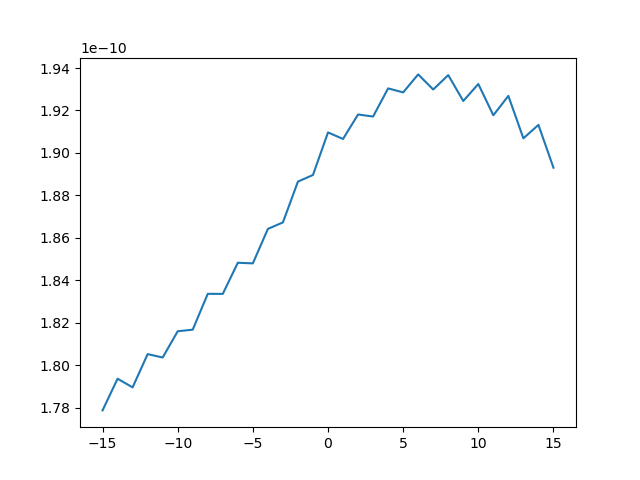

In [17]:
corr_FACC_DNS=signal.correlate(Half_orbit.Density.values,Half_orbit.FAC_C.values[15:-15],mode='valid')

plt.figure()

plt.plot((np.array(range(len(corr_FACC_DNS)))-(len(corr_FACC_DNS)-1)/2),corr_FACC_DNS)
plt.show()

<IPython.core.display.Javascript object>


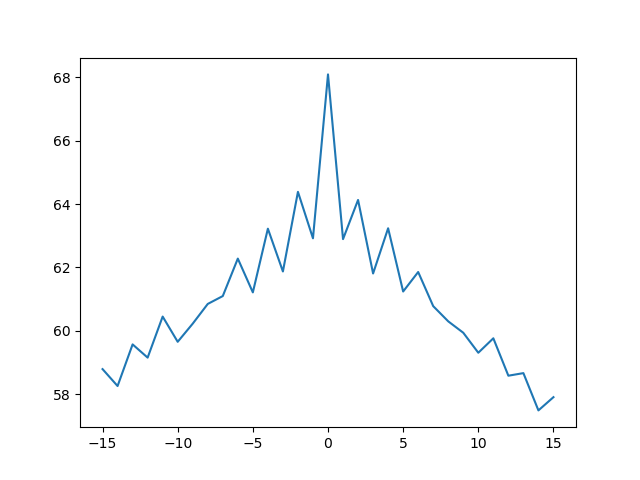

In [18]:
corr_FAC=signal.correlate(Half_orbit.FAC_A.values,Half_orbit.FAC_C.values[15:-15],mode='valid')

plt.figure()

plt.plot((np.array(range(len(corr_FAC)))-(len(corr_FAC)-1)/2),corr_FAC)
plt.show()

<IPython.core.display.Javascript object>


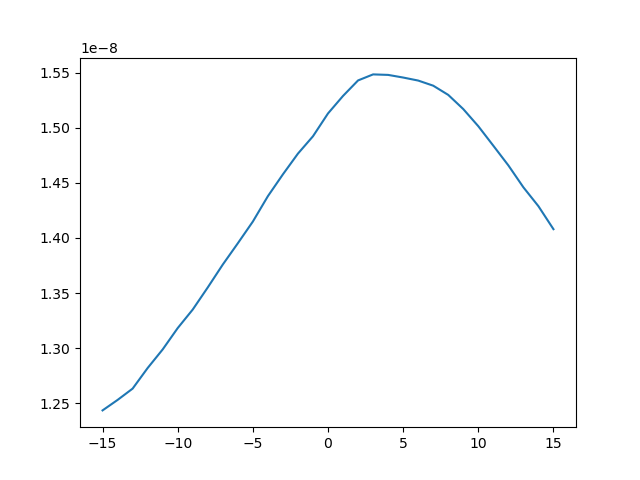

In [19]:
corr_DNS_ap=signal.correlate(Half_orbit.Density.values,Half_orbit.AP_INDEX.values[15:-15],mode='valid')

plt.figure()

plt.plot((np.array(range(len(corr_DNS_ap)))-(len(corr_DNS_ap)-1)/2),corr_DNS_ap)
plt.show()